# Range Search Report

This demo is to measure and visualise the time complexity of each approach. For a thorough explanation view the pdf.

In [1]:
# Set up, run it to measure time and plot performance
import matplotlib.pyplot as plt
import numpy as np
import timeit
from mpl_toolkits.mplot3d import Axes3D
from itertools import repeat

def code_to_test():
    mylist = []
    
    for i in l:
        t.add_new_numbers(mylist, i)
        
    for q in qs:
        t.query(mylist, min(q), max(q))

sizes = [10, 100, 200, 500]
ls = [s for item in sizes for s in repeat(item,4)]
qs = [s for s in sizes] * 4

def run(task):
    for s1 in sizes:
        l = np.random.randint(low=0, high=100000, size=(s1))
        for s2 in sizes:
            qs = np.random.randint(low=0, high=100000, size=(s2,2))
            elapsed_time = %timeit -o code_to_test()
            task.append(elapsed_time.best)

def plot_3d(task):
    fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_trisurf(ls,qs,task11_times)
    ax.invert_xaxis()
    ax.set_xlabel('Length of list')
    ax.set_ylabel('No of queries')
    ax.set_zlabel('Time in s')

## Task 1.1

Given a list we would like to be able to query an arbitrary range, and append to this list upon request. This approach is trivial, and is only meant to be a benchmark. The time complexity for both functions is $\Theta(n)$. Below is an example on how it performs.

44.6 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
410 µs ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
818 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.18 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
157 µs ± 5.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.21 ms ± 82.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.47 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.15 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
271 µs ± 3.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.02 ms ± 37.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.08 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.83 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
600 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.77 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 100 loops 

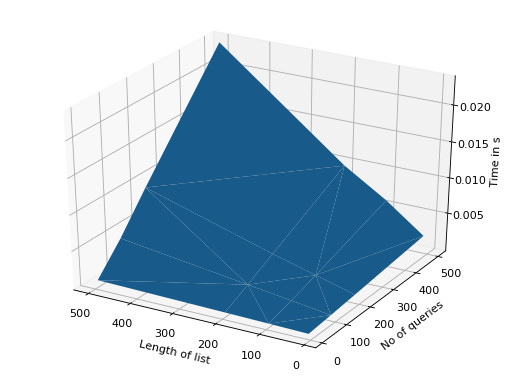

In [2]:
# Task11
from Scripts import Task11 as t

task11_times = []
run(task11_times)

plot_3d(task11_times)

The 3D graph might be a bit unnecessary, it however inmediatly shows that the queries are costly, and subsequent queries do not gain anything from previous ones. The linear nature of this approach is also apparent.

## Task12

For the next approach, we build the list by ordering it upon every append. This is of course costly, but will gain better query performance. The query takes advantage of the ordered structure, and uses binary search for the startpoint of the interval. From that on it returns elements until they fall out of the interval, then it breaks.

### Complexity 
Given that we want to initialise a list of $n$ values, we call the function $n$ times. We put the new element at the end of the list, $\Theta(1)$ and then we sort it using a sorting algorithm, $\Theta(n\log_2n)$. So the total complexity is $\Theta(n^2\log_2⁡n)$, the complexity for the query is,as for binary search $\Theta(log_2n) + k$, for the to be returned $k$ elements.

50.4 µs ± 4.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
403 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
792 µs ± 62.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.12 ms ± 189 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
251 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
753 µs ± 25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.39 ms ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.3 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
714 µs ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.44 ms ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.24 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.56 ms ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.32 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.76 ms ± 320 µs per loop (mean ± std. dev. of 7 runs, 100 loops ea

Text(0.5, 0, 'Time in ms')

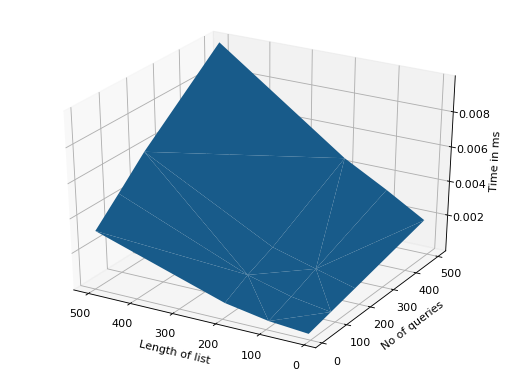

In [3]:
# Task12
from Scripts import Task12 as t

task12_times = []
run(task12_times)

plot_3d(task12_times)

## Task21 

The following approach maintains a tree of the data array, and uses that to find query results, for a full explanation, see the assignment. For the complexity calculations, see the report. 

First, let us convince ourselves that the algorithm works. Upon generating some random inputs, we get the following tree (Please note that the graph.clear() method does not work in jupyter, and thus the kernel needs to be reset before subsequent runs):

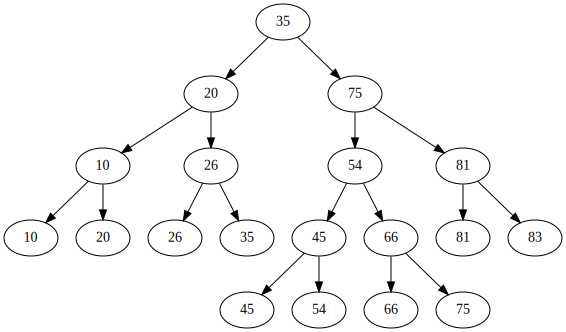

In [3]:
# Test Task21
from graphviz import Digraph
from Scripts import Task21 as t
import numpy as np
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot = Digraph()

def show_tree(node):
    if node.left:
        dot.node(str(node.left),str(node.left.value))
        dot.edge(str(node),str(node.left))
        show_tree(node.left)

    if node.right:
        dot.node(str(node.right),str(node.right.value))
        dot.edge(str(node),str(node.right))
        show_tree(node.right)
        
test_ls = np.random.randint(low=0, high=100, size=(10))
test_qs = np.random.randint(low=0, high=100, size=(2,2))

mylist = []

for i in test_ls:
    t.add_new_numbers(mylist, i)

for element in mylist:
    element = t.Node(element)

t.create_next_level(t.Node.getnodes())
root = t.Node.getroot()
dot.node(str(root),str(root.value))
show_tree(root)
dot

And finally, to see that it returns the correct result:

In [4]:
# Test Task21
for q in test_qs:
    print ("{} - {}:".format(min(q),max(q)), end=" ")
    t.query(root, min(q), max(q), print_res=True)
    print ("")

0 - 23: 20 10 
2 - 24: 20 10 


So now we are in a position to measure the time complexity for this algorithm as well.

In [ ]:
# Task21
from Scripts import Task21 as t
import time

task21_times = []

def code_to_test():
    mylist = []
    
    for i in l:
        t.add_new_numbers(mylist, i)
        
    for element in mylist:
        element = t.Node(element)

    t.create_next_level(t.Node.getnodes())
    root = t.Node.getroot()
        
    for q in qs:
        t.query(root, min(q), max(q))

for s1 in sizes:
    l = np.random.randint(low=0, high=100000, size=(s1))
    for s2 in sizes:
        qs = np.random.randint(low=0, high=100000, size=(s2,2))
        now = time.time()
        
        code_to_test()
        
        elapsed_time = time.time() - now
        task21_times.append(elapsed_time)
        print (elapsed_time) # I am still running

plot_3d(task21_times)

0.0009920597076416016
0.0019919872283935547
0.016957521438598633
0.2942655086517334
0.04559135437011719
5.296121120452881
114.26074028015137
3023.5579035282135
1092.3285291194916


As we can observe the last approach is not doing too well, this is partly because of the implementation, and partly because the gain is low for a one dimensional case, it is only meant to be an introduction to what follows. For further analysis however, consult the report, as this concludes the demo for now.